![title](source/title.png)
<a id="toc"></a>

<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h2>Table of Contents</h2>
        </center>

   
<ol>
    <a href="#init" style="color: #7a0723;">Initializing</a> 
    <li><a href="#first" style="color: #7a0723;">Introduction</a></li>
    <li><a href="#second" style="color: #7a0723;">Methodology</a></li>
    <li><a href="#third" style="color: #7a0723;">Exploratory Analysis</a></li>
    <li><a href="#fourth" style="color: #7a0723;">Teste Z para comparação de duas proporções</a></li>

<!--     <li><a href="#seventh"></a></li> -->
<!--     <li><a href="#eighth">Teste t pareado para duas médias</a></li> -->
<!--     <li><a href="#ninth">Teste F para duas variâncias</a></li> -->
<!--     <li><a href="#tenth">Teste t para duas médias</a></li> -->
</ol>


</div>

<a id="init"></a>

# Initializing

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<!-- <a id="first"></a> -->

<a id="first" style="
  background-color: #7a0723;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>1. Introduction</h1>
        </center>

   
<ol>
<!--     <li><a href="#ea-init">Initializing</a></li> -->

</ol>


</div>

<a id="second" style="
  background-color: #7a0723;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>

  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>2. Methodology</h1>
        </center>

   
<ol>
<!--     <li><a href="#ea-init">Initializing</a></li> -->

</ol>


</div>

<a id="third" style="
  background-color: #7a0723;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
<div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
        <center>
            <h1>3. Exploratory Analysis</h1>
        </center>

   
<ol>
    <li><a href="#ea-init" style="color: #7a0723;">Initializing</a></li>
    <li><a href="#ea-func" style="color: #7a0723;">Useful Functions</a></li>
    <li><a href="#ea-data" style="color: #7a0723;">The Dataset</a></li>
</ol>


</div>

<a id="ea-init"></a>
## 3.1 Initializing


In [11]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy for statistics
from scipy import stats

# os to manipulate files
import os

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
    

In [62]:
sns.set_style("darkgrid")

# Setting a custom color palette
sns.set_palette(sns.color_palette(
    ["#7a0723","#ff5b21","#f7cf60", "#ff94c0","#323133"]
))

<a id="ea-func"></a>

<h2>3.2 Defining Useful Functions <a style="
  border-radius: 10px;
  background-color: #f1f1f1;
  border: none;
  color: #7a0723;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  padding: 4px 4px;
  font-size: 14px;" href="#third">↻</a></h2>


<a id="ea-data"></a>
<h2>3.3 The Dataset <a style="
  border-radius: 10px;
  background-color: #f1f1f1;
  border: none;
  color: #7a0723;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  padding: 4px 4px;
  font-size: 14px;" href="#third">↻</a></h2>

In [51]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Import Dataset
df1 = pd.read_csv(os.path.join('data','drug200.csv'))#.drop('Unnamed: 0',axis=1)
df1.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
34,53,M,NORMAL,HIGH,14.133,drugX
188,65,M,HIGH,NORMAL,34.997,DrugY
75,26,M,LOW,NORMAL,20.909,DrugY
140,49,M,HIGH,NORMAL,6.269,drugA
50,58,F,HIGH,HIGH,19.416,DrugY


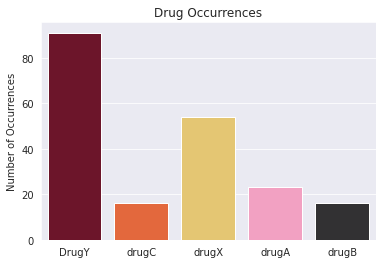

In [79]:
ax = sns.countplot(x=df1['Drug'],data=df1)
ax.set(xlabel='', ylabel='Number of Occurrences',title='Drug Occurrences')
plt.show()

**Observations**

* **DrugY** is the most observed

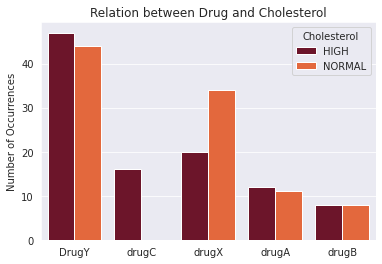

In [78]:
ax = sns.countplot(x=df1['Drug'],hue='Cholesterol',data=df1)
ax.set(xlabel='', ylabel='Number of Occurrences',title='Relation between Drug and Cholesterol')
plt.show()

**Observations**

* **DrugC** is only observed in people with high cholesterol

* **DrugX** is observed more in people with normal cholesterol than with high cholesterol

### Numerical Features

In [29]:
df1.groupby(by='Drug').agg(['mean','std'])

Age               Na_to_K          
            mean        std       mean       std
Drug                                            
DrugY  43.747253  17.031731  22.374780  6.060195
drugA  35.869565   9.696786  10.918783  2.037642
drugB  62.500000   7.127412  11.524375  1.869919
drugC  42.500000  16.725230  10.633750  2.045009
drugX  44.018519  16.435685  10.650556  2.198091

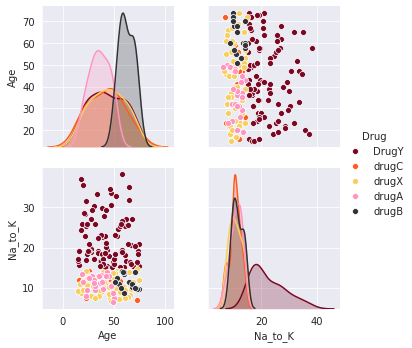

In [64]:
g = sns.pairplot(df1, hue="Drug")

**Observations**
1. **DrugY**: Mainly for `Na_to_K $\gtrsim 10$ 
2. Except for **DrugY**, all drugs exhibits `Na_to_K` $\lesssim 10$ 
3. **DrugA** not observed in people over 55 years old (conf: ~95%)
3. **DrugB** mainly for people over 48 years old (conf: ~95%)